In [27]:
%load_ext autoreload
%autoreload 2

# This tells Python to show the plots inside this notebook.
%matplotlib inline
# We have to import the plotting library into this Jupyter notebook
# We only have to do this once (unless you close and open the notebook,
# then you'll have to do it again)
import matplotlib.pyplot as plt
import itertools
import pandas

In [2]:
nasa_astronaut_dataset = pandas.read_csv("astronauts.csv")
print (nasa_astronaut_dataset.head) #First 10 rows

<bound method NDFrame.head of                       Name    Year  Group   Status Birth Date  \
0          Joseph M. Acaba  2004.0   19.0   Active  5/17/1967   
1           Loren W. Acton     NaN    NaN  Retired   3/7/1936   
2         James C. Adamson  1984.0   10.0  Retired   3/3/1946   
3          Thomas D. Akers  1987.0   12.0  Retired  5/20/1951   
4              Buzz Aldrin  1963.0    3.0  Retired  1/20/1930   
..                     ...     ...    ...      ...        ...   
352          David A. Wolf  1990.0   13.0  Retired  8/23/1956   
353  Neil W. Woodward III   1998.0   17.0  Retired  7/26/1962   
354       Alfred M. Worden  1966.0    5.0  Retired   2/7/1932   
355          John W. Young  1962.0    2.0  Retired  9/24/1930   
356        George D. Zamka  1998.0   17.0  Retired  6/29/1962   

           Birth Place Gender  \
0        Inglewood, CA   Male   
1         Lewiston, MT   Male   
2           Warsaw, NY   Male   
3        St. Louis, MO   Male   
4        Montclair, NJ  

In [3]:
row = nasa_astronaut_dataset["Space Flight (hr)"].idxmax()
astronaut = nasa_astronaut_dataset["Name"][row]
hours = nasa_astronaut_dataset["Space Flight (hr)"][row]

print(f"{astronaut} has the most flight hours with a total of {hours} hours.")


Jeffrey N. Williams has the most flight hours with a total of 12818 hours.


In [4]:
gender_occurrence = nasa_astronaut_dataset.groupby('Gender').count()
gender_military = gender_occurrence["Military Rank"]
gender_occurrence_name = gender_occurrence["Name"]
print (gender_military)
#print (gender_occurrence)
#print (gender_occurrence_name)

Gender
Female     13
Male      194
Name: Military Rank, dtype: int64


In [5]:
#gender = nasa_astronaut_dataset["Gender"]
gender = ["Female", "Male"]
count_row = nasa_astronaut_dataset.shape[0]
print (gender)

['Female', 'Male']


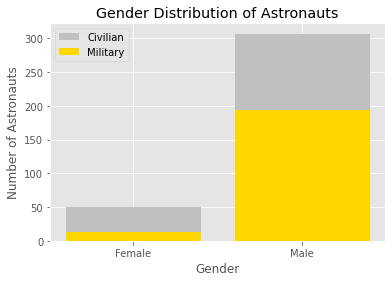

In [6]:
plt.style.use("ggplot")
plt.bar(gender, gender_occurrence_name, width=0.8, label='Civilian', color='silver')
plt.bar(gender, gender_military, width = 0.8, label = 'Military', color = 'gold')
plt.xlabel("Gender")
plt.ylabel("Number of Astronauts")
plt.title("Gender Distribution of Astronauts")

plt.legend(loc="upper left")
plt.show()

In [17]:
#Age at selection
birth_date = nasa_astronaut_dataset["Birth Date"]
birth_years_list = []
selection_years_list = []
selection_age_list = []

def get_birth_years_list(birth_date):
    """
    Extracts the year from the D.O.B. column of the dataset and creates a list.
    
    args:
        birth_date: the "Birth Date" column of the dataset
        
    return:
        birth_years_list: a list of the birth years 
    """
    for i in birth_date:
        birth_year = int(i[-4:])
        birth_years_list.append(birth_year)

    return birth_years_list

selection_year = nasa_astronaut_dataset["Year"]

def get_selection_years_list(selection_year):
    """
    Create a list of the astronaut selection years.
    
    args:
        selection_year: the "Year" column of the dataset.
    
    return:
        selection_years_list: a list of all of the selection years.
    """
    for i in selection_year:
        selection_years_list.append(i)
        
    return selection_years_list

def get_selection_age(birth_date, selection_year):
    """
    """
    birth_year = get_birth_years_list(birth_date)
    year_of_selection = get_selection_years_list(selection_year)
    
    for i in birth_year:
        for j in year_of_selection:
            if j == None:
                selection_age_list.append("N/A")
                break
            else:
                selection_age_list.append(j-i)
                break

    return selection_age_list

print (get_selection_age(birth_date, selection_year))
#print (get_selection_years_list(selection_year))           

[37.0, 68.0, 58.0, 53.0, 74.0, 49.0, 67.0, 45.0, 71.0, 45.0, 45.0, 37.0, 55.0, 44.0, 74.0, 41.0, 50.0, 28.0, 52.0, 51.0, 51.0, 45.0, 51.0, 60.0, 73.0, 72.0, 34.0, 62.0, 45.0, 62.0, 67.0, 40.0, 58.0, 76.0, 40.0, 48.0, 53.0, 73.0, 61.0, 37.0, 61.0, 48.0, 48.0, 53.0, 59.0, 48.0, 70.0, 43.0, 47.0, 55.0, 45.0, 46.0, 35.0, 52.0, 55.0, 47.0, 79.0, 72.0, 57.0, 61.0, 34.0, 56.0, 70.0, 69.0, 42.0, 54.0, 69.0, 43.0, 44.0, 50.0, 43.0, 57.0, 52.0, 58.0, 54.0, 44.0, 45.0, 74.0, 74.0, 77.0, 58.0, 45.0, 61.0, 67.0, 64.0, 55.0, 72.0, 42.0, 46.0, 51.0, 54.0, 42.0, 51.0, 69.0, 55.0, 61.0, 36.0, 46.0, 74.0, 62.0, 72.0, 34.0, 71.0, 65.0, 43.0, 48.0, 39.0, 37.0, 30.0, 55.0, 58.0, 47.0, 44.0, 47.0, 47.0, 47.0, 74.0, 43.0, 68.0, 58.0, 43.0, 56.0, 56.0, 72.0, 74.0, 49.0, 48.0, 68.0, 58.0, 74.0, 83.0, 52.0, 42.0, 75.0, 47.0, 59.0, 73.0, 63.0, 47.0, 65.0, 78.0, 46.0, 53.0, 71.0, 48.0, 40.0, 52.0, 48.0, 48.0, 58.0, 71.0, 63.0, 53.0, 46.0, 78.0, 52.0, 52.0, 42.0, 46.0, 49.0, 40.0, 54.0, 45.0, 43.0, 60.0, 65.0, 36.

In [49]:
birth_date = nasa_astronaut_dataset["Birth Date"]
selection_year = nasa_astronaut_dataset["Year"]

nasa_astronaut_dataset['Birth Date'] = nasa_astronaut_dataset['Birth Date'].str[-4:]

nasa_astronaut_dataset["Selection Year"] = selection_year
nasa_astronaut_dataset

selectioner = nasa_astronaut_dataset["Selection Year"]

print(len(nasa_astronaut_dataset.iloc[:,1]))



for i in range(len(nasa_astronaut_dataset.iloc[:,1])):
    if nasa_astronaut_dataset.iloc[i,1] == 1984.0:
        print(nasa_astronaut_dataset.iloc[i,0])
    pass

nasa_astronaut_dataset


357
James C. Adamson
Ellen S. Baker
Mark N. Brown
Kenneth D. Cameron
Manley Lanier Carter Jr. 
John H. Casper
Frank L. Culbertson Jr. 
Sidney M. Gutierrez
L. Blaine Hammond Jr. 
Marsha S. Ivins
Mark C. Lee
G. David Low
Michael J. McCulley
James A. McDivitt
William M. Shepherd
Kathryn C. Thornton
Charles Lacy Veach
James D. Wetherbee


,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Selection Year
0,Joseph M. Acaba,2004.0,19.0,Active,1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,2004.0
1,Loren W. Acton,NaN,NaN,Retired,1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,1984.0
3,Thomas D. Akers,1987.0,12.0,Retired,1951,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,1987.0
4,Buzz Aldrin,1963.0,3.0,Retired,1930,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,1963.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,1956,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,NaN,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN,1990.0
353,Neil W. Woodward III,1998.0,17.0,Retired,1962,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,Commander,US Navy,0,0,0,0.0,NaN,NaN,NaN,1998.0
354,Alfred M. Worden,1966.0,5.0,Retired,1932,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,Colonel,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN,1966.0
355,John W. Young,1962.0,2.0,Retired,1930,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,Captain,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN,1962.0


In [14]:
nasa_astronaut_dataset.dtypes

nasa_astronaut_dataset.astype({"Birth Date" : "float64"}).dtypes



Name                    object
Year                   float64
Group                  float64
Status                  object
Birth Date             float64
Birth Place             object
Gender                  object
Alma Mater              object
Undergraduate Major     object
Graduate Major          object
Military Rank           object
Military Branch         object
Space Flights            int64
Space Flight (hr)        int64
Space Walks              int64
Space Walks (hr)       float64
Missions                object
Death Date              object
Death Mission           object
dtype: object

In [90]:
colleges = nasa_astronaut_dataset.iloc[:,7]

list(colleges)

college_list = []

for i in colleges:
    i = str(i)
    split_list = i.split(";")
    college_list += split_list
    

college_frequency = {}

for college in college_list:
    if college not in college_frequency:
        college_frequency[college] = 1
    else:
        college_frequency[college] += 1
print(college_frequency)

{'University of California-Santa Barbara': 1, ' University of Arizona': 4, 'Montana State University': 1, ' University of Colorado': 8, 'US Military Academy': 18, ' Princeton University': 3, 'University of Missouri-Rolla': 2, ' MIT': 24, 'Villanova University': 1, ' University of Florida': 5, 'DePauw University': 1, ' Yale University': 1, 'University of Illinois': 5, ' US Naval Postgraduate School': 31, 'US Naval Academy': 52, ' Air Force Institute of Technology': 5, 'Hastings College': 1, ' Iowa State University': 1, 'University of Washington': 5, ' Creighton University': 1, 'MIT': 12, ' University of Washington': 6, 'Harvard University': 2, 'University of Illinois-Urbana': 1, 'Purdue University': 15, ' University of Southern California': 8, 'Frostburg State University': 1, ' University of Maryland': 5, 'University of Idaho': 1, ' University of Tennessee': 6, 'George Washington University': 1, ' University of Texas': 7, 'Drexel University': 3, ' Thomas Jefferson University': 1, 'State

In [103]:
new ={k: v for k, v in sorted(college_frequency.items(), key=lambda item: item[1], reverse = True)}

In [104]:
new

{'US Naval Academy': 52,
 'US Air Force Academy': 38,
 ' US Naval Postgraduate School': 31,
 ' MIT': 24,
 'US Military Academy': 18,
 'Purdue University': 15,
 ' Stanford University': 15,
 'MIT': 12,
 ' Georgia Institute of Technology': 10,
 ' University of Colorado': 8,
 ' University of Southern California': 8,
 ' California Institute of Technology': 8,
 ' Purdue University': 8,
 'University of Colorado': 8,
 ' University of Texas': 7,
 ' University of Houston': 7,
 'Stanford University': 7,
 ' University of Washington': 6,
 ' University of Tennessee': 6,
 'University of Texas': 6,
 ' University of Houston-Clear Lake': 6,
 ' George Washington University': 6,
 ' US Air Force Institute of Technology': 6,
 ' University of Florida': 5,
 'University of Illinois': 5,
 ' Air Force Institute of Technology': 5,
 'University of Washington': 5,
 ' University of Maryland': 5,
 'Cornell University': 5,
 ' Columbia University': 5,
 'University of California-Berkeley': 5,
 ' University of Virginia':

In [105]:
# Initialize limit 
N = 10
    
# Using islice() + items() 
# Get first N items in dictionary 
out = dict(itertools.islice(new.items(), N)) 
        
# printing result  
print(out)

{'US Naval Academy': 52, 'US Air Force Academy': 38, ' US Naval Postgraduate School': 31, ' MIT': 24, 'US Military Academy': 18, 'Purdue University': 15, ' Stanford University': 15, 'MIT': 12, ' Georgia Institute of Technology': 10, ' University of Colorado': 8}


In [113]:
nasa_astronaut_dataset

nasa_astronaut_dataset["Birth Date"] = nasa_astronaut_dataset["Birth Date"].astype(float)
nasa_astronaut_dataset.dtypes


for i in range(len(nasa_astronaut_dataset.iloc[:,1])):
    if nasa_astronaut_dataset.iloc[i,1] == 1984.0:
        print(nasa_astronaut_dataset.iloc[i,0])
    pass

nasa_astronaut_dataset["Selection Age"] = nasa_astronaut_dataset["Selection Year"] - nasa_astronaut_dataset["Birth Date"]

nasa_astronaut_dataset

James C. Adamson
Ellen S. Baker
Mark N. Brown
Kenneth D. Cameron
Manley Lanier Carter Jr. 
John H. Casper
Frank L. Culbertson Jr. 
Sidney M. Gutierrez
L. Blaine Hammond Jr. 
Marsha S. Ivins
Mark C. Lee
G. David Low
Michael J. McCulley
James A. McDivitt
William M. Shepherd
Kathryn C. Thornton
Charles Lacy Veach
James D. Wetherbee


,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,...,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Selection Year,Selection Age
0,Joseph M. Acaba,2004.0,19.0,Active,1967.0,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,...,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN,2004.0,37.0
1,Loren W. Acton,NaN,NaN,Retired,1936.0,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,...,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN,NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,1946.0,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,...,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN,1984.0,38.0
3,Thomas D. Akers,1987.0,12.0,Retired,1951.0,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,...,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaN,NaN,1987.0,36.0
4,Buzz Aldrin,1963.0,3.0,Retired,1930.0,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,...,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaN,NaN,1963.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,David A. Wolf,1990.0,13.0,Retired,1956.0,"Indianapolis, IN",Male,Purdue University; Indiana University,Electrical Engineering,Medicine,...,NaN,3,4044,7,41.0,STS-58 (Columbia). STS-86/89 (Atlantis/Endeavo...,NaN,NaN,1990.0,34.0
353,Neil W. Woodward III,1998.0,17.0,Retired,1962.0,"Chicago, IL",Male,MIT; University of Texas-Austin; George Washin...,Physics,Physics; Business Management,...,US Navy,0,0,0,0.0,NaN,NaN,NaN,1998.0,36.0
354,Alfred M. Worden,1966.0,5.0,Retired,1932.0,"Jackson, MI",Male,US Military Academy; University of Michigan,Military Science,Aeronautical & Astronautical Engineering,...,US Air Force (Retired),1,295,1,0.5,Apollo 15,NaN,NaN,1966.0,34.0
355,John W. Young,1962.0,2.0,Retired,1930.0,"San Francisco, CA",Male,Georgia Institute of Technology,Aeronautical Engineering,NaN,...,US Navy (Retired),6,835,3,20.0,"Gemini 3, Gemini 10, Apollo 10, Apollo 16, STS...",NaN,NaN,1962.0,32.0


In [1]:
import functions as f

In [2]:
nasa_astronaut_dataset = f.get_data()

f.change_dates(nasa_astronaut_dataset)

f.add_selection_age(nasa_astronaut_dataset)

f.highest_flight_hours(nasa_astronaut_dataset)

filtered = f.filter_by_year(nasa_astronaut_dataset, 1980, 1990)

new = f.frequency(nasa_astronaut_dataset, 7)

f.tops(new, 10)

{'US Naval Academy': 52,
 'US Air Force Academy': 38,
 ' US Naval Postgraduate School': 31,
 ' MIT': 24,
 'US Military Academy': 18,
 'Purdue University': 15,
 ' Stanford University': 15,
 'MIT': 12,
 ' Georgia Institute of Technology': 10,
 ' University of Colorado': 8}

nan


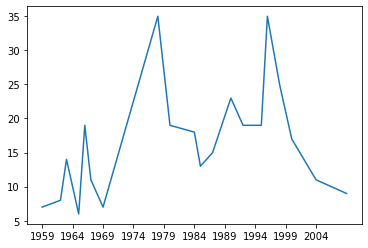

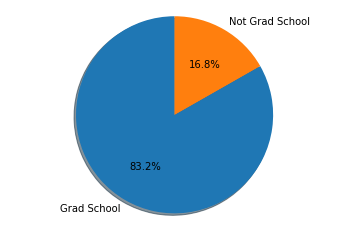

In [110]:
gender_military, gender_occurrence_name = f.gender_military(nasa_astronaut_dataset)

f.most_space_walks(nasa_astronaut_dataset)

f.frequency(nasa_astronaut_dataset,1)


f.plot_astronauts_vs_time(nasa_astronaut_dataset)


import math

grad_or_not = list(nasa_astronaut_dataset.iloc[:,9])

print(grad_or_not[355])

type(grad_or_not[354])


f.grad_school_vs_not_grad_school(nasa_astronaut_dataset)

